<a href="https://www.kaggle.com/ayesha111/project-2-house-prices-regression-techniques?scriptVersionId=87319452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace = True)

In [7]:
df.drop("Alley", axis = 1, inplace = True)

In [8]:
df['MasVnrType'].fillna(df['MasVnrType'].mode()[0], inplace = True)

In [9]:
df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0], inplace = True)

In [10]:
df['BsmtQual'].fillna(df['BsmtQual'].mode()[0], inplace = True)

In [11]:
df['BsmtCond'].fillna(df['BsmtCond'].mode()[0], inplace = True)

In [12]:
df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0], inplace = True)

In [13]:
df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0], inplace = True)

In [14]:
df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0], inplace = True)

In [15]:
df['Electrical'].fillna(df['Electrical'].mode([0]), inplace = True)

In [16]:
df.drop("FireplaceQu", axis = True, inplace = True)

In [17]:
df['GarageType'].fillna(df['GarageType'].mode()[0], inplace = True)

In [18]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0], inplace = True)

In [19]:
df['GarageFinish'].fillna(df['GarageFinish'].mode()[0], inplace = True)

In [20]:
df['GarageQual'].fillna(df['GarageQual'].mode()[0], inplace = True)

In [21]:
df['GarageCond'].fillna(df['GarageCond'].mode()[0], inplace = True)

In [22]:
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace = True)

In [23]:
df.drop('PoolQC', axis = 1, inplace = True)

In [24]:
df.drop('Fence', axis = 1 , inplace = True)

In [25]:
df.drop('MiscFeature', axis = 1 , inplace = True)

In [26]:
df.drop('Id', axis = 1 , inplace = True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [28]:
df.shape

(1460, 75)

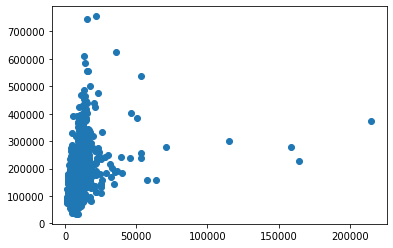

In [29]:
plt.scatter(df['LotArea'], df['SalePrice'])

**In the above scatter plot it is shown that the Selling Price of the house is directly proportional to the Lot Area. Except for the few outliers.**

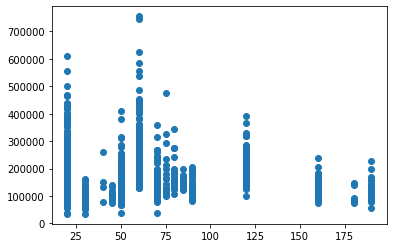

In [30]:
plt.scatter(df['MSSubClass'], df['SalePrice'])

**The above scatter plot shows us the relationship between MSSubClass and SalePrice, where the MSSubclass identifies the type of dwelling involved in the sale and the SalePrice is the Selling Price of the house. We can infer that the 2-STORY 1946 & NEWER houses has the highest price**

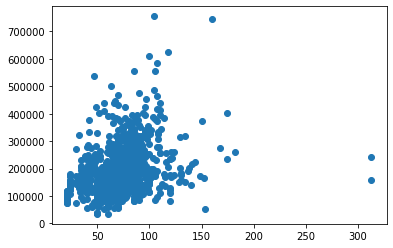

In [31]:
plt.scatter(df['LotFrontage'],df['SalePrice'])